# Tutorial 2: exercise

(c) 2018 Justin Bois. With the exception of pasted graphics, where the source is noted, this work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT).

This document was prepared at [Caltech](http://www.caltech.edu) with financial support from the [Donna and Benjamin M. Rosen Bioengineering Center](http://rosen.caltech.edu).

<img src="caltech_rosen.png">

*This tutorial exercise was generated from an Jupyter notebook.  You can download the notebook [here](t2_exercise.ipynb). Use this downloaded Jupyter notebook to fill out your responses.*

### Exercise 1

The [Anderson-Fisher iris data set](https://en.wikipedia.org/wiki/Iris_flower_data_set) is a classic data set used in statistical and machine learning applications. Edgar Anderson carefully measured the lengths and widths of the petals and sepals of 50 irises in each of three species, *I. setosa*, *I. versicolor*, and *I. virginica*. Ronald Fisher then used this data set to distinguish the three species from each other.

**a)** Load the data set, which you can download [here](../data/anderson-fisher-iris.csv) into a Pandas `DataFrame` called `df`. Be sure to check out the structure of the data set before loading. You will need to use the `header=[0,1]` kwarg of `pd.read_csv()` to load the data set in properly.

In [20]:
import numpy as np
import pandas as pd

import altair as alt

import altair_catplot as altcat

alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [4]:
pwd

'/Users/chenxinhong'

In [5]:
# Check the stucture of the dataset before loading into dataframe
with open('./data/anderson-fisher-iris.csv', 'r') as f:
    for _ in range(30):
        print(next(f), end='')

setosa,setosa,setosa,setosa,versicolor,versicolor,versicolor,versicolor,virginica,virginica,virginica,virginica
sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
,,,,,,,,,,,
5.1,3.5,1.4,0.2,7.0,3.2,4.7,1.4,6.3,3.3,6.0,2.5
4.9,3.0,1.4,0.2,6.4,3.2,4.5,1.5,5.8,2.7,5.1,1.9
4.7,3.2,1.3,0.2,6.9,3.1,4.9,1.5,7.1,3.0,5.9,2.1
4.6,3.1,1.5,0.2,5.5,2.3,4.0,1.3,6.3,2.9,5.6,1.8
5.0,3.6,1.4,0.2,6.5,2.8,4.6,1.5,6.5,3.0,5.8,2.2
5.4,3.9,1.7,0.4,5.7,2.8,4.5,1.3,7.6,3.0,6.6,2.1
4.6,3.4,1.4,0.3,6.3,3.3,4.7,1.6,4.9,2.5,4.5,1.7
5.0,3.4,1.5,0.2,4.9,2.4,3.3,1.0,7.3,2.9,6.3,1.8
4.4,2.9,1.4,0.2,6.6,2.9,4.6,1.3,6.7,2.5,5.8,1.8
4.9,3.1,1.5,0.1,5.2,2.7,3.9,1.4,7.2,3.6,6.1,2.5
5.4,3.7,1.5,0.2,5.0,2.0,3.5,1.0,6.5,3.2,5.1,2.0
4.8,3.4,1.6,0.2,5.9,3.0,4.2,1.5,6.4,2.7,5.3,1.9
4.8,3.0,1.4,0.1,6.0,2.2,4.0,1.0,6.8,3.0,5.5,2.1
4.3,3.0,1.1,0.1,6.1,2.9,4.7,1.4,5.7,2.5,5.

We could see there are 2 levels of heading, so we should use header = [0,1] to properly load the data

In [6]:
df = pd.read_csv('./data/anderson-fisher-iris.csv',
                comment = '#',
                header = [0,1])
df.head()

setosa                                                      \
  sepal length (cm) sepal width (cm) petal length (cm) petal width (cm)   
0               5.1              3.5               1.4              0.2   
1               4.9              3.0               1.4              0.2   
2               4.7              3.2               1.3              0.2   
3               4.6              3.1               1.5              0.2   
4               5.0              3.6               1.4              0.2   

         versicolor                                                      \
  sepal length (cm) sepal width (cm) petal length (cm) petal width (cm)   
0               7.0              3.2               4.7              1.4   
1               6.4              3.2               4.5              1.5   
2               6.9              3.1               4.9              1.5   
3               5.5              2.3               4.0              1.3   
4               6.5              2.8               4.6              1.5   

          virginica                                                      
  sepal length (cm) sepal width (cm) petal length (cm) petal width (cm)  
0               6.3              3.3               6.0              2.5  
1               5.8              2.7               5.1              1.9  
2               7.1              3.0               5.9              2.1  
3               6.3              2.9               5.6              1.8  
4               6.5              3.0               5.8              2.2

**b)** Take a look `df`. Is it tidy? Why or why not?

We could see that the data is not tidy, as it mentioned in the tutorial, a tidy data should has the following format:
1. Each column is a variable
2. Each row is an observation
3. Each type of observation unit forms a seperate table
And we could see each species has 4 variables (same across all the species)

A tidy dataset would have 5 columns: 'species','sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)'
And each row would be an observation (a fish)


**c)** Perform the following operations to make a new `DataFrame` from the original one you loaded in exercise 1 to generate a new `DataFrame`. Do these operations one-by-one and explain what you are doing to the `DataFrame` in each one. The Pandas documentation might help.

In [7]:
# df.stack(level= ) stack the specific level from columns to index
df_tidy = df.stack(level=0)
df_tidy.head()

petal length (cm)  petal width (cm)  sepal length (cm)  \
0 setosa                    1.4               0.2                5.1   
  versicolor                4.7               1.4                7.0   
  virginica                 6.0               2.5                6.3   
1 setosa                    1.4               0.2                4.9   
  versicolor                4.5               1.5                6.4   

              sepal width (cm)  
0 setosa                   3.5  
  versicolor               3.2  
  virginica                3.3  
1 setosa                   3.0  
  versicolor               3.2

In the orginal dataframe, the information of species is in the first level, we use df.stack() to stack this level from columns to index. Compare to the df.melt() we used in tutorial, df.stack() is more useful for this kind of hierarchical indexing. But I am still a little confused for the use of df.stack() vs df.melt().

And we could see the new index levels are automatically sorted by the old index. This automatically sorting dosen't make sense for our data, so we need to tell Pandas to sort by our new index level which leads to the step below.  

In [8]:
# sort the data by labels in the new index level we created (species) using .sort_index(level= )
df_tidy = df_tidy.sort_index(level = 1)
df_tidy.head()

,,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
0,setosa,1.4,0.2,5.1,3.5
1,setosa,1.4,0.2,4.9,3.0
2,setosa,1.3,0.2,4.7,3.2
3,setosa,1.5,0.2,4.6,3.1
4,setosa,1.4,0.2,5.0,3.6


As mentioned before, we sorted the data by the label in new index level (species), it returns the dataframe with multi-index, but the index level1 (species) is actually a column that we want eventually, so we need to make it into a column in next step. 

In [9]:
# When dealing with multi-level index dataframe, we use .reset_index(level = )to return a new dataframe with labels (under the index names) in columns

df_tidy = df_tidy.reset_index(level = 1)
df_tidy.head()

,level_1,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
0,setosa,1.4,0.2,5.1,3.5
1,setosa,1.4,0.2,4.9,3.0
2,setosa,1.3,0.2,4.7,3.2
3,setosa,1.5,0.2,4.6,3.1
4,setosa,1.4,0.2,5.0,3.6


We turn the information in new index level into a column. But the column name should be 'species' instead of 'level_1', so we change column name in next step

In [11]:
# We rename the column name from 'level_1' to 'species'
df_tidy = df_tidy.rename(columns = {'level_1':'species'})
df_tidy.head()

,species,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
0,setosa,1.4,0.2,5.1,3.5
1,setosa,1.4,0.2,4.9,3.0
2,setosa,1.3,0.2,4.7,3.2
3,setosa,1.5,0.2,4.6,3.1
4,setosa,1.4,0.2,5.0,3.6


**d)** Is the resulting `DataFrame` tidy? Why or why not?

The resulting dataframe is now tidy, because each variable forms a column and each observation (a fish) forms a row. And this table is a type of observation unit.

**e)** Using `df_tidy`, slice out all of the sepal lengths for I. versicolor as a Numpy array. 

In [12]:
# slice out the sepal length of I. versicolor from the df_tidy into df_tidy_versicolor_sl
inds = df_tidy['species'] == 'versicolor'
df_tidy_versicolor_sl = df_tidy.loc[inds,'sepal length (cm)']

# Convert it to numpy array
np.array(df_tidy_versicolor_sl)


array([7. , 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. ,
       6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6,
       6.8, 6.7, 6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6,
       5.5, 5.5, 6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7])

We could also do the following to return a dataframe and then convert the sepal length into numpy array

inds = df_tidy['species'] == 'versicolor'  
inds1 = df_tidy.columns == 'sepal length (cm)'  
df_tidy_versicolor_sl1 = df_tidy.loc[inds,inds1]  
  
np.array(df_tidy_versicolor_sl1['sepal length (cm)'])

### Exercise 2

**a)** Make a scatter plot of sepal width versus petal length with the glyphs colored by species.

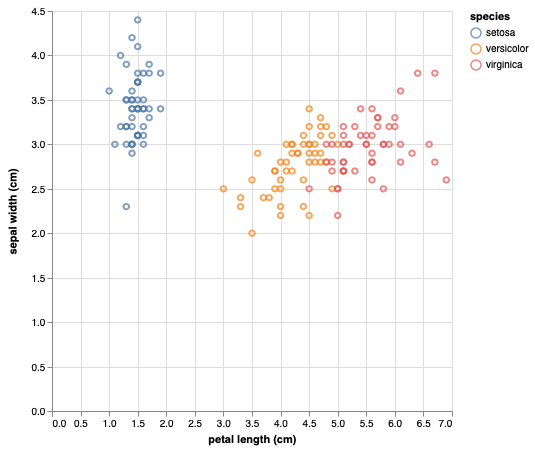

In [16]:
# the initial version of scatter plot 
sw_pl = alt.Chart(df_tidy, height = 400, width = 400
                 ).mark_point(
                 ).encode(
                    x = alt.X('petal length (cm):Q'),
                    y = alt.Y('sepal width (cm):Q'),
                    color = 'species:N'
                 )
sw_pl

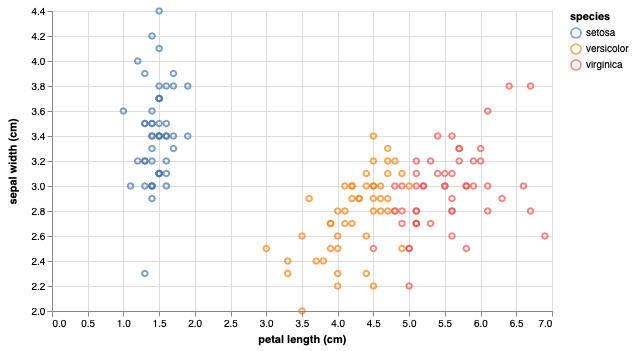

In [17]:
# agjust the scale of axis and the plot
sw_pl = alt.Chart(df_tidy, height = 300, width = 500
                 ).mark_point(
                 ).encode(
                    x = alt.X('petal length (cm):Q'),
                    y = alt.Y('sepal width (cm):Q', scale=alt.Scale(zero=False)),
                    color = 'species:N'
                 )
sw_pl

**b)** Make a plot comparing the petal widths of the respective species. Comment on why you chose the plot you chose.

I decide to overlay jitter and box plots to compare the petal widths. Because by using the jitter plot, we could clearly see all the data points and get a general idea of their distribution along the axis. At the same time, overlay the box plot would allow us to get the important statistics. In general, you could look at the statistic for the whole population of each species, simultaneously, you could look into individual within that population. 

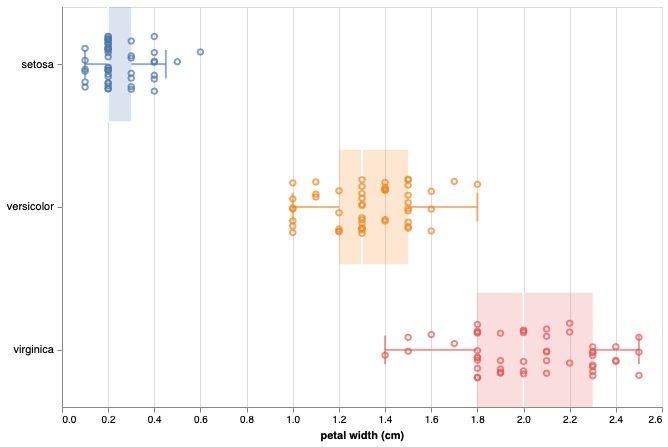

In [67]:
# I use altcat.catplot() and 'jitterbox' transform to do the plotting
altcat.catplot(data = df_tidy, 
               height = 400, 
               width = 600,
               mark = 'point',
               encoding = dict(y = alt.Y('species:N'),
                               x = alt.X('petal width (cm):Q'),
                               color = alt.Color('species:N',legend = None),
                               tooltip = alt.Tooltip(['species:N','petal width (cm):Q'])),
               box_mark = dict(strokeWidth=4, opacity=0.2),
               whisker_mark = dict(strokeWidth=2, opacity=0.6),
               transform = 'jitterbox'
              )

In [19]:
%load_ext watermark

In [22]:
%watermark -v -p numpy,pandas,altair,altair_catplot,jupyterlab

CPython 3.6.5
IPython 6.4.0

numpy 1.14.3
pandas 0.23.0
altair 2.2.2
altair_catplot 0.0.3
jupyterlab 0.34.9
